<a href="https://colab.research.google.com/github/kimdonggyu2008/SKT_FLY_AI_6/blob/main/15_nn_multiple_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

뉴럴 네트워크 다중분류(아이리스)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import seaborn as sns

In [9]:
!wget https://raw.githubusercontent.com/devdio/flyai_datasets/refs/heads/main/iris.csv

--2025-01-02 07:44:56--  https://raw.githubusercontent.com/devdio/flyai_datasets/refs/heads/main/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv.1’

iris.csv.1          100%[===================>]   3.77K  --.-KB/s    in 0s      

2025-01-02 07:44:56 (33.0 MB/s) - ‘iris.csv.1’ saved [3858/3858]



In [10]:
df=pd.read_csv('iris.csv')
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df.columns=[col.replace(' ','_') for col in df.columns]

In [12]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#데이터 분리

In [14]:
x=df.drop('Species',axis=1)
y=df['Species']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [18]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x_train_s=ss.fit_transform(x_train)

In [19]:
y_train

,Species
22,setosa
15,setosa
65,versicolor
11,setosa
42,setosa
...,...
71,versicolor
106,virginica
14,setosa
92,versicolor


In [23]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(y_train)
y_train_e=le.transform(y_train)
y_test_e=le.transform(y_test)

In [24]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#원핫인코딩

In [27]:
from keras.utils import to_categorical

y_train_o=to_categorical(y_train_e) #각 카테고리별 마킹해줌
y_train_o[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [29]:
type(x_train_s), type(y_train_o)

(numpy.ndarray, numpy.ndarray)

# 모델 만들기


In [30]:
x_train.shape

(120, 4)

In [31]:
from keras import layers

model=keras.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(units=16,activation='relu'),
    layers.Dense(units=19,activation='relu'),
    layers.Dense(units=3,activation='softmax'),
])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │             323 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 463 (1.81 KB)

 Trainable params: 463 (1.81 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
batch_size=100
epochs=300

hist=model.fit(x_train_s,
          y_train_o,
          epochs=epochs,
          validation_split=0.2,
          batch_size=batch_size)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9792 - loss: 0.0811 - val_accuracy: 0.9583 - val_loss: 0.1041
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9792 - loss: 0.0809 - val_accuracy: 0.9583 - val_loss: 0.1040
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9792 - loss: 0.0808 - val_accuracy: 0.9583 - val_loss: 0.1040
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9792 - loss: 0.0806 - val_accuracy: 0.9583 - val_loss: 0.1039
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9792 - loss: 0.0804 - val_accuracy: 0.9583 - val_loss: 0.1038
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9792 - loss: 0.0802 - val_accuracy: 0.9583 - val_loss: 0.1038
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9792 - loss: 0.0800 - val_accuracy: 0.9583 - val_loss: 0.1037
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9792 - loss: 0.0799 - val_accuracy: 0.9583 - val_loss:

In [49]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train_acc')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val_acc')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()


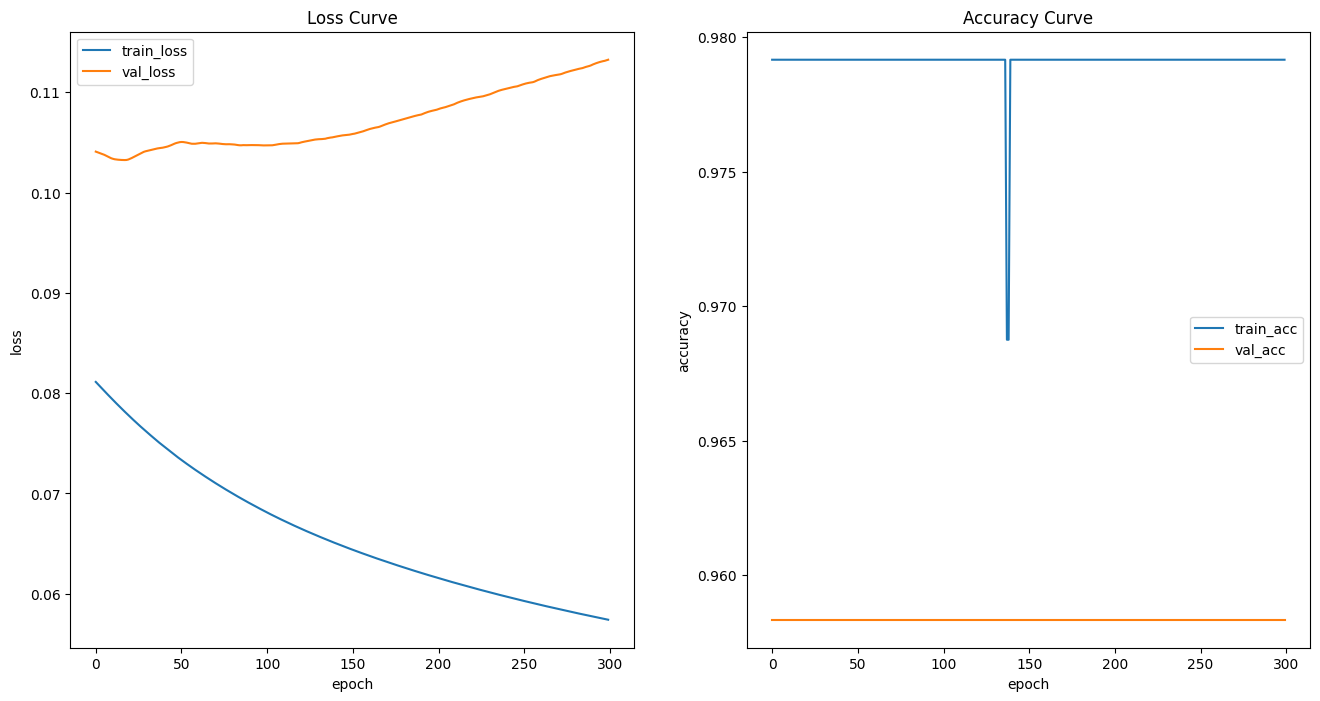

In [50]:
plot_history(hist)

#테스트

In [51]:
x_test_s=ss.transform(x_test)
y_test_e=le.transform(y_test)
y_test_o=to_categorical(y_test_e)

In [52]:
y_pred_o=model.predict(x_test_s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [56]:
y_pred_o

array([[3.62303952e-04, 9.94509935e-01, 5.12772193e-03],
       [9.96546686e-01, 3.45249684e-03, 7.21964454e-07],
       [1.70785697e-08, 1.57799423e-05, 9.99984086e-01],
       [3.02549032e-03, 9.45709765e-01, 5.12646474e-02],
       [1.68745988e-04, 9.82376456e-01, 1.74547955e-02],
       [9.97838318e-01, 2.15931679e-03, 2.31978879e-06],
       [2.69054552e-03, 9.96215701e-01, 1.09377783e-03],
       [1.55543938e-04, 1.14183761e-02, 9.88426030e-01],
       [1.75291498e-04, 7.51984239e-01, 2.47840539e-01],
       [4.31538007e-04, 9.98838246e-01, 7.30219122e-04],
       [2.04849709e-03, 8.74966532e-02, 9.10454869e-01],
       [9.99785423e-01, 2.12983447e-04, 1.55186399e-06],
       [9.99151647e-01, 8.47765594e-04, 5.05426215e-07],
       [9.99766588e-01, 2.31999555e-04, 1.25464715e-06],
       [9.99753118e-01, 2.46743963e-04, 1.99288266e-07],
       [2.60576839e-03, 9.82265651e-01, 1.51286339e-02],
       [5.25916803e-05, 1.10899203e-03, 9.98838484e-01],
       [3.62218474e-04, 9.98413

In [57]:
y_pred_a=np.argmax(y_pred_o,axis=1)

In [59]:
y_pred_a

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [60]:
y_test_e

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [61]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def print_metrics(y_true,y_pred):
  acc=accuracy_score(y_true,y_pred)
  re=recall_score(y_true,y_pred,average='macro')
  pre=precision_score(y_true,y_pred,average='macro')
  f1=f1_score(y_true,y_pred,average='macro')

  print("acc:",acc)
  print("re:",re)
  print("pre:",pre)
  print("f1:",f1)
  cfm=confusion_matrix(y_true,y_pred)
  s=sns.heatmap(cfm,annot=True,fmt='d',cbar=False,cmap='Blues')
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()


acc: 1.0
re: 1.0
pre: 1.0
f1: 1.0


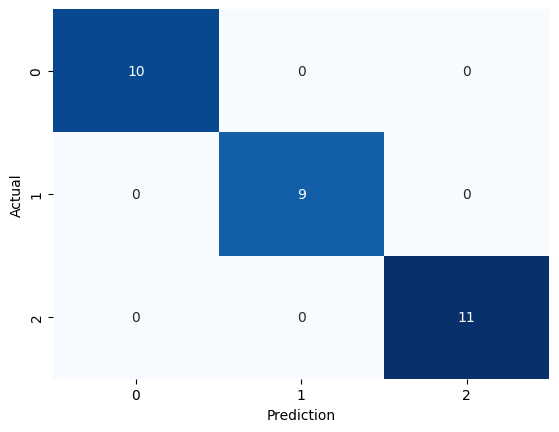

In [64]:
print_metrics(y_test_e,y_pred_a)